# Materials API - Exercise 1

In this excercise, your task is to plot the distribution of crystal systems (cubic, tetragonal, monoclinic, etc) within all SiO$_2$ compounds. You will do this through the following 3 steps:

1. Retrieve the spacegroup entries in the MP database with the formula SiO$_2$
2. Collect their crystal systems
3. Plot a bar chart with the data

## Step 1: Retrieve the spacegroup entries in the MP database with the formula SiO$_2$

Use the Materials API to get the __"symmetry"__ property for all SiO$_2$ compounds. 

_Hint: use the `query` method of the `MPRester`._

In [9]:
# Your code here
from mp_api.matproj import MPRester

with MPRester("<your API key>") as mpr:
    SiO2_entries = mpr.query(chemsys_formula="SiO2", fields=["symmetry"])


In [11]:
print(SiO2_entries[0].symmetry)

crystal_system=<CrystalSystem.hex_: 'Hexagonal'> symbol='P6_3/mmc' number=194 point_group='6/mmm' symprec=0.1 version='1.16.1'


## Step 2: Extract the crystal_system property for the entries we retrieved into a list

_Hint: "crystal_system" is a sub-entry of the symmetry property._

In [15]:
# Your code here

crystal_systems = []
for entry in SiO2_entries:
    crystal_systems.append(entry.symmetry.crystal_system)

In [17]:
print(crystal_systems[0:10])

[<CrystalSystem.hex_: 'Hexagonal'>, <CrystalSystem.cubic: 'Cubic'>, <CrystalSystem.ortho: 'Orthorhombic'>, <CrystalSystem.trig: 'Trigonal'>, <CrystalSystem.hex_: 'Hexagonal'>, <CrystalSystem.ortho: 'Orthorhombic'>, <CrystalSystem.tet: 'Tetragonal'>, <CrystalSystem.tet: 'Tetragonal'>, <CrystalSystem.ortho: 'Orthorhombic'>, <CrystalSystem.ortho: 'Orthorhombic'>]


## Step 3: Process the data and plot the results

Our data is currently a list of crystal systems. Your task now is to create a "count_dict" where each key is the name of the crystal system and it's value is the count for that crystal system. Once you have written code to create `count_dict`, you the cell beneath it will plot the data for you.

_Hint: Iterate through the list of crystal_systems you just created using a for loop and check if they are already in the dictionary before updating any entries._

In [36]:
count_dict = {}
# Your code here|
for entry in crystal_systems:
    count_dict[entry] = count_dict[entry] + 1 if entry in count_dict else 0

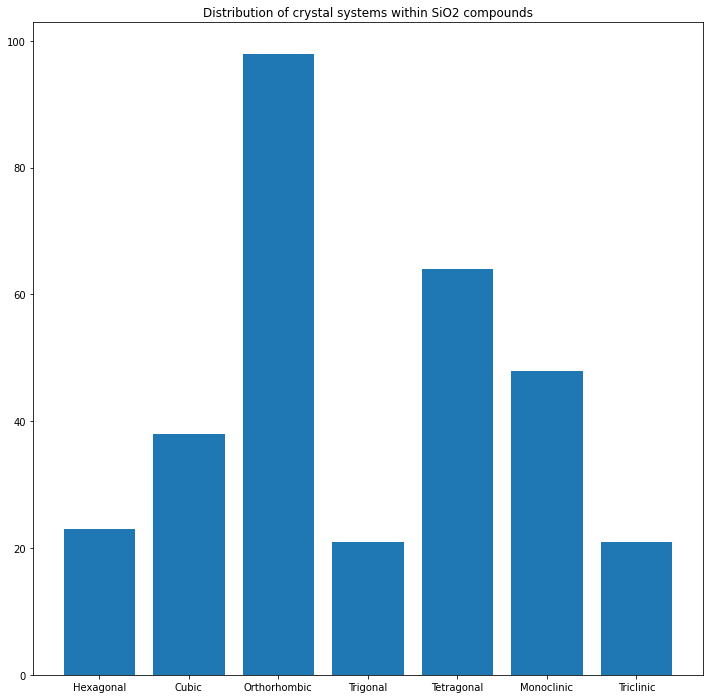

In [37]:
import matplotlib.pyplot as plt

%matplotlib inline

# The code below plots the distribution
plt.figure(figsize=(12,12))
plt.bar(range(len(count_dict)), count_dict.values(), align='center')
plt.xticks(range(len(count_dict)), [str(key) for key in list(count_dict.keys())])
plt.title('Distribution of crystal systems within SiO2 compounds')
plt.show()